In [1]:
from sklearn.metrics import (confusion_matrix, 
                             precision_score,
                             recall_score,
                             roc_auc_score,
                             RocCurveDisplay,
                             ConfusionMatrixDisplay,
                             PrecisionRecallDisplay)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight

from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Анализ датасета

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Анализ пропущенных значений

In [4]:
print(f'Количество объектов с пропущенными значениями: {df.isnull().any(axis = 1).sum()}') 

Количество объектов с пропущенными значениями: 0


### Анализ выбросов

In [5]:
nums = []
ids = set()

for feature in df.drop(['Class'], axis = 1).columns:

    Q1 = df[feature].quantile(q = .25)
    Q3 = df[feature].quantile(q = .75)
    IQR = Q3 - Q1

    emissions = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)] 
    nums.append(emissions.shape[0])

    ids.update(emissions.index)

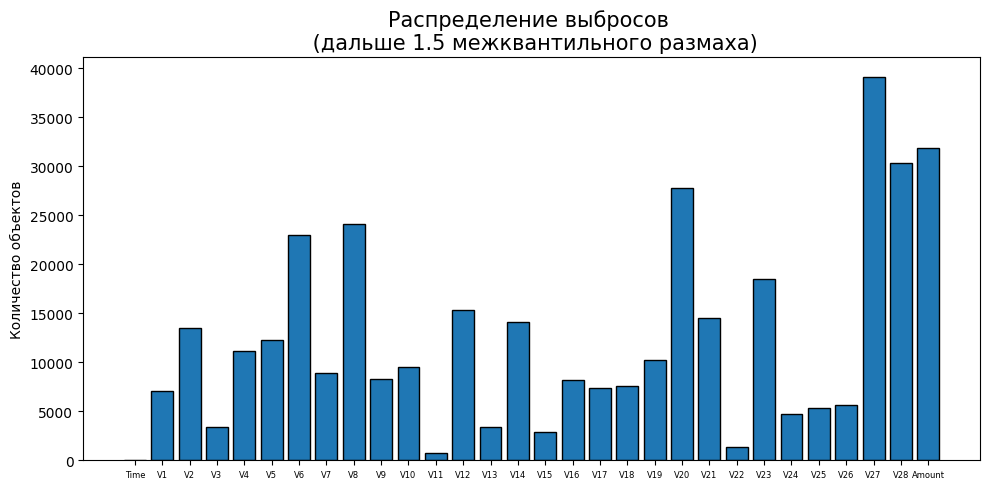

In [6]:
plt.figure(figsize = (10, 5))
plt.rc('xtick', labelsize = 6) 

plt.bar(df.drop(['Class'], axis = 1).columns, nums, edgecolor = 'black')

plt.ylabel('Количество объектов')
plt.title('Распределение выбросов \n (дальше 1.5 межквантильного размаха)', fontsize = 15)

plt.tight_layout()
plt.show()

In [7]:
df = df.drop(ids)

### Распределение классов

In [8]:
def classes_distr(df, title = None):
    plt.figure(figsize = (5, 5))
    plt.rc('xtick', labelsize = 10)

    plot = sns.countplot(x = 'Class', data = df, palette = ["#0101DF", "#DF0101"], edgecolor = 'black')

    for p in plot.patches:
        plot.annotate(int(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 7), 
                    textcoords = 'offset points')

    plt.title(title, fontsize = 15, pad = 20)
    plt.show()

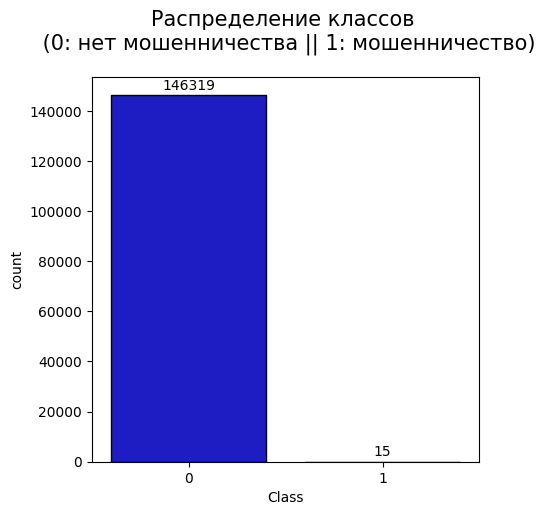

In [9]:
classes_distr(df, title = 'Распределение классов \n (0: нет мошенничества || 1: мошенничество)')

### Корреляция

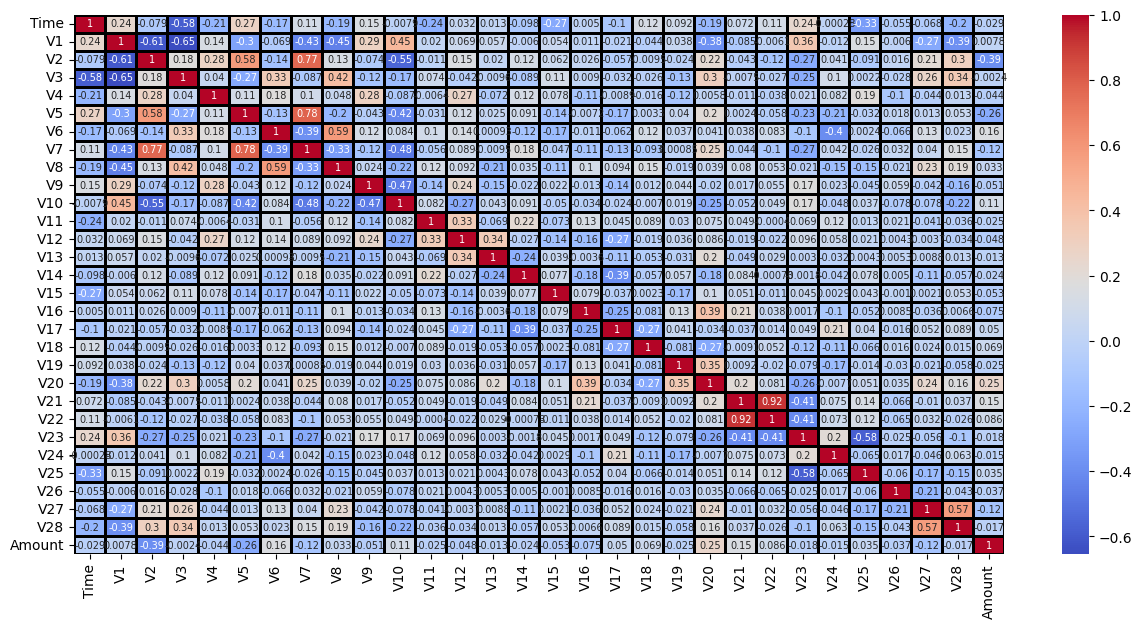

In [10]:
plt.figure(figsize = (15, 7))

sns.heatmap(df.drop(['Class'], axis = 1).corr(), 
            cmap = 'coolwarm', 
            linewidths = 2, 
            linecolor = 'black', 
            annot = True,
            annot_kws = {"fontsize" : 7})

plt.show()

# Задание 1

### Разделение на train и test

In [11]:
non_fraud_cls = df[df['Class'] == 0]
fraud_cls = df[df['Class'] == 1]

In [12]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(non_fraud_cls.drop(['Class'], axis = 1), non_fraud_cls['Class'], test_size = .2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(fraud_cls.drop(['Class'], axis = 1), fraud_cls['Class'], test_size = .2)

In [13]:
X_train = pd.concat([X_train1, X_train2]).sample(frac = 1)
X_test  = pd.concat([X_test1, X_test2]).sample(frac = 1)

y_train = pd.concat([y_train1, y_train2]).sample(frac = 1)
y_test = pd.concat([y_test1, y_test2]).sample(frac = 1)

In [14]:
X_train_US, y_train_US = RandomOverSampler().fit_resample(X_train, y_train)

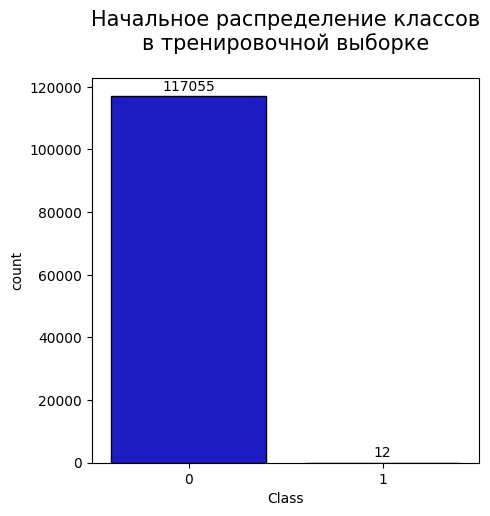

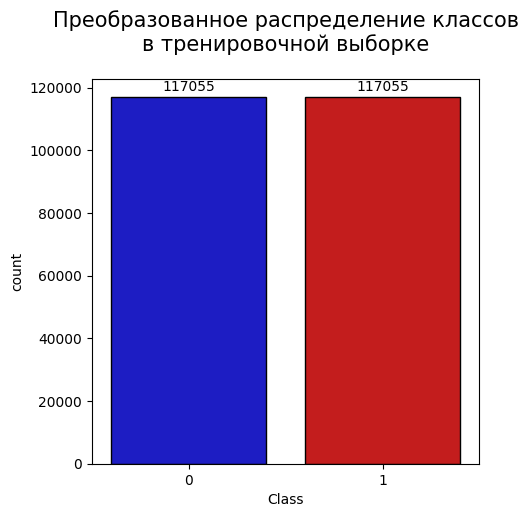

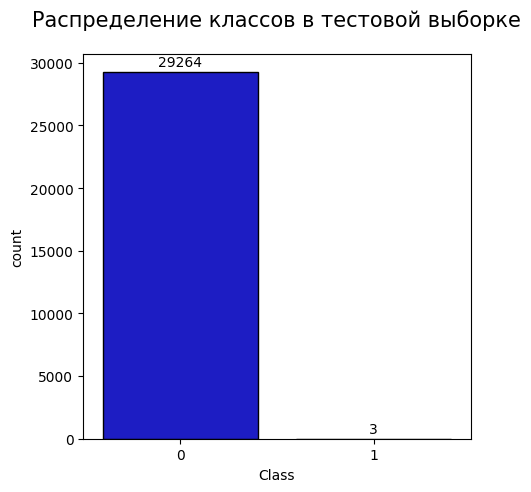

In [15]:
classes_distr(pd.DataFrame(y_train), title = 'Начальное распределение классов\nв тренировочной выборке')
classes_distr(pd.DataFrame(y_train_US), title = 'Преобразованное распределение классов\nв тренировочной выборке')
classes_distr(pd.DataFrame(y_test), title = 'Распределение классов в тестовой выборке')

### Классификация

In [16]:
estimator = GradientBoostingClassifier().fit(X_train_US, y_train_US)
y_pred = estimator.predict(X_test)

<Figure size 600x600 with 0 Axes>

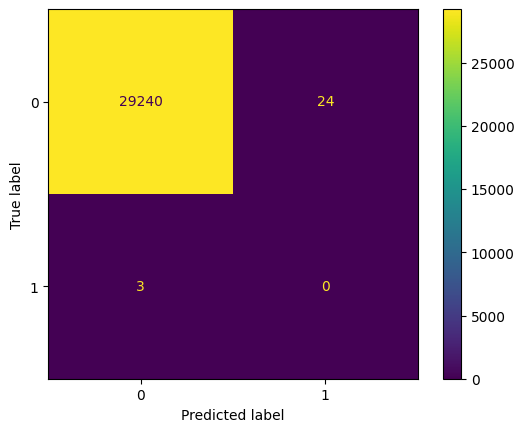

In [17]:
plt.figure(figsize = (6, 6))

ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)

plt.show()

# Задание 2

In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
specificity = tn / (tn + fp) * 100

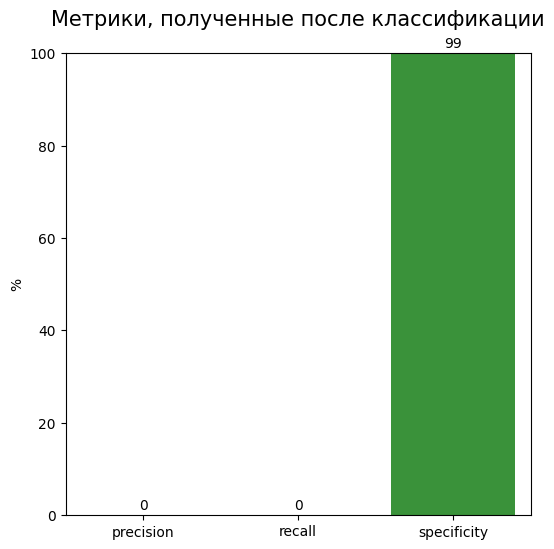

In [19]:
data = dict(x = ['precision', 'recall', 'specificity'], y = [precision, recall, specificity])
data = pd.DataFrame(data)

plt.figure(figsize = (6, 6))
plt.rc('xtick', labelsize = 10)

plot = sns.barplot(x = 'x', y = 'y', data = data)

for p in plot.patches:
    plot.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha = 'center', 
                va = 'center', 
                xytext = (0, 7), 
                textcoords = 'offset points')

plt.ylim([0, 100])

plt.xlabel('')
plt.ylabel('%')

plt.title('Метрики, полученные после классификации', fontsize = 15, pad = 20)
plt.show()

# Задание 3

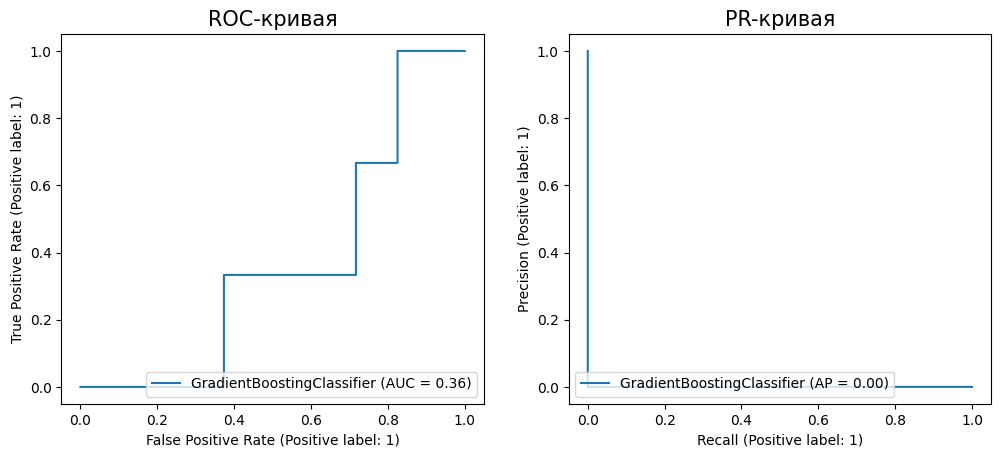

In [20]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)

RocCurveDisplay.from_estimator(estimator, X_test, y_test, ax = ax[0])
PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test, ax = ax[1])

ax[0].set_title('ROC-кривая', fontsize = 15)
ax[1].set_title('PR-кривая', fontsize = 15)

plt.show()

# Задание 4

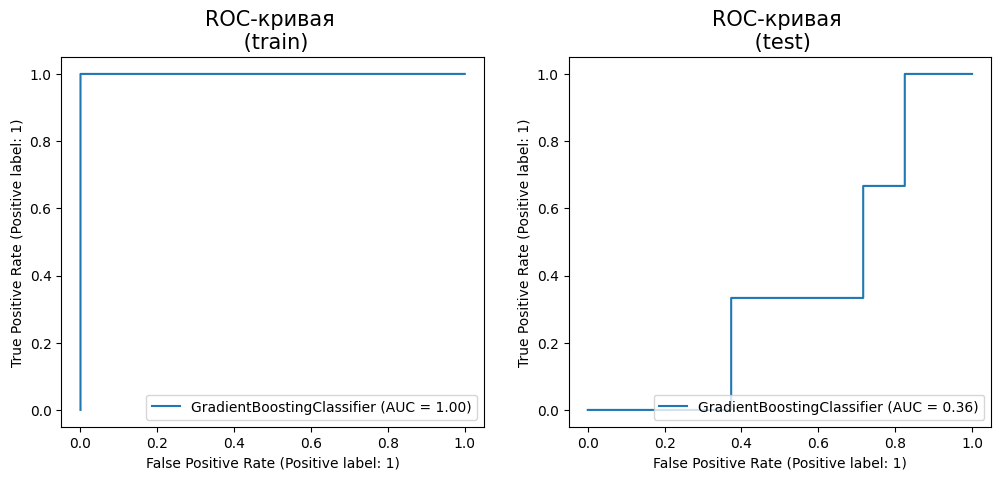

In [21]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)

RocCurveDisplay.from_estimator(estimator, X_train, y_train, ax = ax[0])
RocCurveDisplay.from_estimator(estimator, X_test, y_test, ax = ax[1])

ax[0].set_title('ROC-кривая \n (train)', fontsize = 15)
ax[1].set_title('ROC-кривая \n (test)', fontsize = 15)

plt.show()

# Задание 5

In [22]:
ada_boost_aucs = []
grad_boost_aucs = []

for n_estimators in range(50, 150):

    ada_boost = AdaBoostClassifier(n_estimators = n_estimators).fit(X_train, y_train, sample_weight = weigths)
    grad_boost = GradientBoostingClassifier(n_estimators = n_estimators).fit(X_train, y_train, sample_weight = weigths)

    ada_boost_aucs.append(roc_auc_score(y_test, ada_boost.predict(X_test)) * 100)
    grad_boost_aucs.append(roc_auc_score(y_test, grad_boost.predict(X_test)) * 100)

NameError: name 'weigths' is not defined

In [ ]:
plt.figure(figsize = (10, 4))

plt.plot(range(50, 150), ada_boost_aucs, linewidth = 2, label = 'AdaBoostClassifier')
plt.plot(range(50, 150), grad_boost_aucs, linewidth = 2, label = 'GradientBoostingClassifier')

plt.xlabel('n_estimators') 
plt.ylabel('ROC-AUC')

plt.yticks(range(0, 101, 10))

plt.title('Влияние значеия n_estimators на ROC-AUC')

plt.legend()
plt.grid()

plt.show()